Bộ dữ liệu có các thuộc tính liên quan đến hoạt động của máy móc và hệ thống sản xuất. Dưới đây là các thuộc tính chính:
Date: Ngày ghi nhận dữ liệu.
* Machine_ID: Mã máy để nhận dạng từng máy riêng lẻ.
* Assembly_Line_No: Số dây chuyền sản xuất mà máy hoạt động.
* Hydraulic_Pressure(bar): Áp suất thủy lực của máy (đơn vị: bar).
* Coolant_Pressure(bar): Áp suất chất làm mát (đơn vị: bar).
* Air_System_Pressure(bar): Áp suất hệ thống không khí (đơn vị: bar).
* Coolant_Temperature: Nhiệt độ chất làm mát.
* Hydraulic_Oil_Temperature(°C): Nhiệt độ dầu thủy lực.
* Spindle_Bearing_Temperature(°C): Nhiệt độ vòng bi trục chính.
* Spindle_Vibration(μm): Độ rung của trục chính.
* Tool_Vibration(μm): Độ rung của dụng cụ cắt.
* Spindle_Speed(RPM): Tốc độ quay của trục chính (đơn vị: vòng/phút).
* Voltage(volts): Điện áp hoạt động.
* Torque(Nm): Mô-men xoắn (đơn vị: Nm).
* Cutting(kN): Lực cắt (đơn vị: kN).
* Downtime: Trạng thái máy ngừng hoạt động.

Dữ liệu này giúp quản lý và theo dõi các thông số quan trọng liên quan đến hoạt động của máy móc, nhằm xác định các yếu tố ảnh hưởng đến hiệu suất và thời gian ngừng hoạt động.

Mô tả bài toán :

* Bài toán code này tập trung vào việc dự đoán áp suất thủy lực của máy dựa trên các thông số kỹ thuật khác trong bộ dữ liệu. Mục tiêu là xây dựng một mô hình hồi quy tuyến tính để dự đoán giá trị Hydraulic_Pressure(bar) từ các đặc trưng khác và đánh giá hiệu suất của mô hình qua các chỉ số như Mean Squared Error (MSE) và R^2 Score.

In [1]:
pip install scikit-learn

Cài đặt thư viện scikit-learn để sử dụng các công cụ học máy

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
import seaborn as sns


Import các thư viện để xử lý dữ liệu, xây dựng và đánh giá mô hình hồi quy tuyến tính.

In [3]:
file_path = '/content/MachineDowntime.csv'
data = pd.read_csv(file_path)

Đọc dữ liệu từ file CSV và lưu vào data.

In [ ]:
print(data.dtypes)

Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature                float64
Hydraulic_Oil_Temperature(?C)      float64
Spindle_Bearing_Temperature(?C)    float64
Spindle_Vibration(?m)              float64
Tool_Vibration(?m)                 float64
Spindle_Speed(RPM)                 float64
Voltage(volts)                     float64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object


In [4]:
print(data.columns)

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
       'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)',
       'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')


Tạo danh sách tên cột một cách tự động, dựa trên các thuộc tính cho mỗi đặc trưng trong danh sách features

In [5]:
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
    'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
    'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)',
    'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

đọc dữ liệu trong dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [7]:
data.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(?C)  Spindle_Bearing_Temperature(?C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   
3                           44.2                             40.6   
4                           47.3                             31.4   

   Spindle_Vibration(?m)  Tool_Vibration(?m)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   
3                  0.618              30.791             18461.0   
4                  0.983              25.516             26526.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure  
3           360.0   25.860029         3.55  Machine_Failure  
4           354.0   25.515874         3.55  Machine_Failure

lấy 5 hàng đầu tiên của dataset

In [8]:
train_data = data.sample(frac=0.75, random_state=1)

dùng để tạo tập dữ liệu huấn luyện bằng cách lấy ngẫu nhiên 75% dữ liệu từ dataset

In [9]:
len(train_data)

1875

In [ ]:
in ra chiều dài của tập dữ liệu

In [12]:
test_data = data.drop(train_data.index)

dừng để tạo tập dữ liệu kiểm tra bằng cách loại bỏ các hàng đã được chọn vào train_dataset ra khỏi dataset và tách dữ liệu thành hai phần không trùng nhau gồm 75% cho huấn luyện và 25% cho kiểm tra

In [14]:
len(test_data)

625

tính độ dài của tập dữ liệu kiểm tra

In [15]:
x_train, y_train = train_data.iloc[:, 2:], train_data.iloc[:, 1]
x_test, y_test = test_data.iloc[:, 2:], test_data.iloc[:, 1]

chia tập dữ liệu huấn luyện và tập kiểm tra thành hai phần
- đặc trưng là các cột đầu dùng dự đoán kết quả được lưu trong x_train và x_test.
- nhãn là cootk kết quả được lưu trong y_train và y_test

In [23]:
x_train = x_train.drop(columns=['Torque(Nm)'], errors='ignore')
x_test = x_test.drop(columns=['Torque(Nm)'], errors='ignore')

In [17]:
print(x_train.columns)

Index(['Assembly_Line_No', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
       'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object')


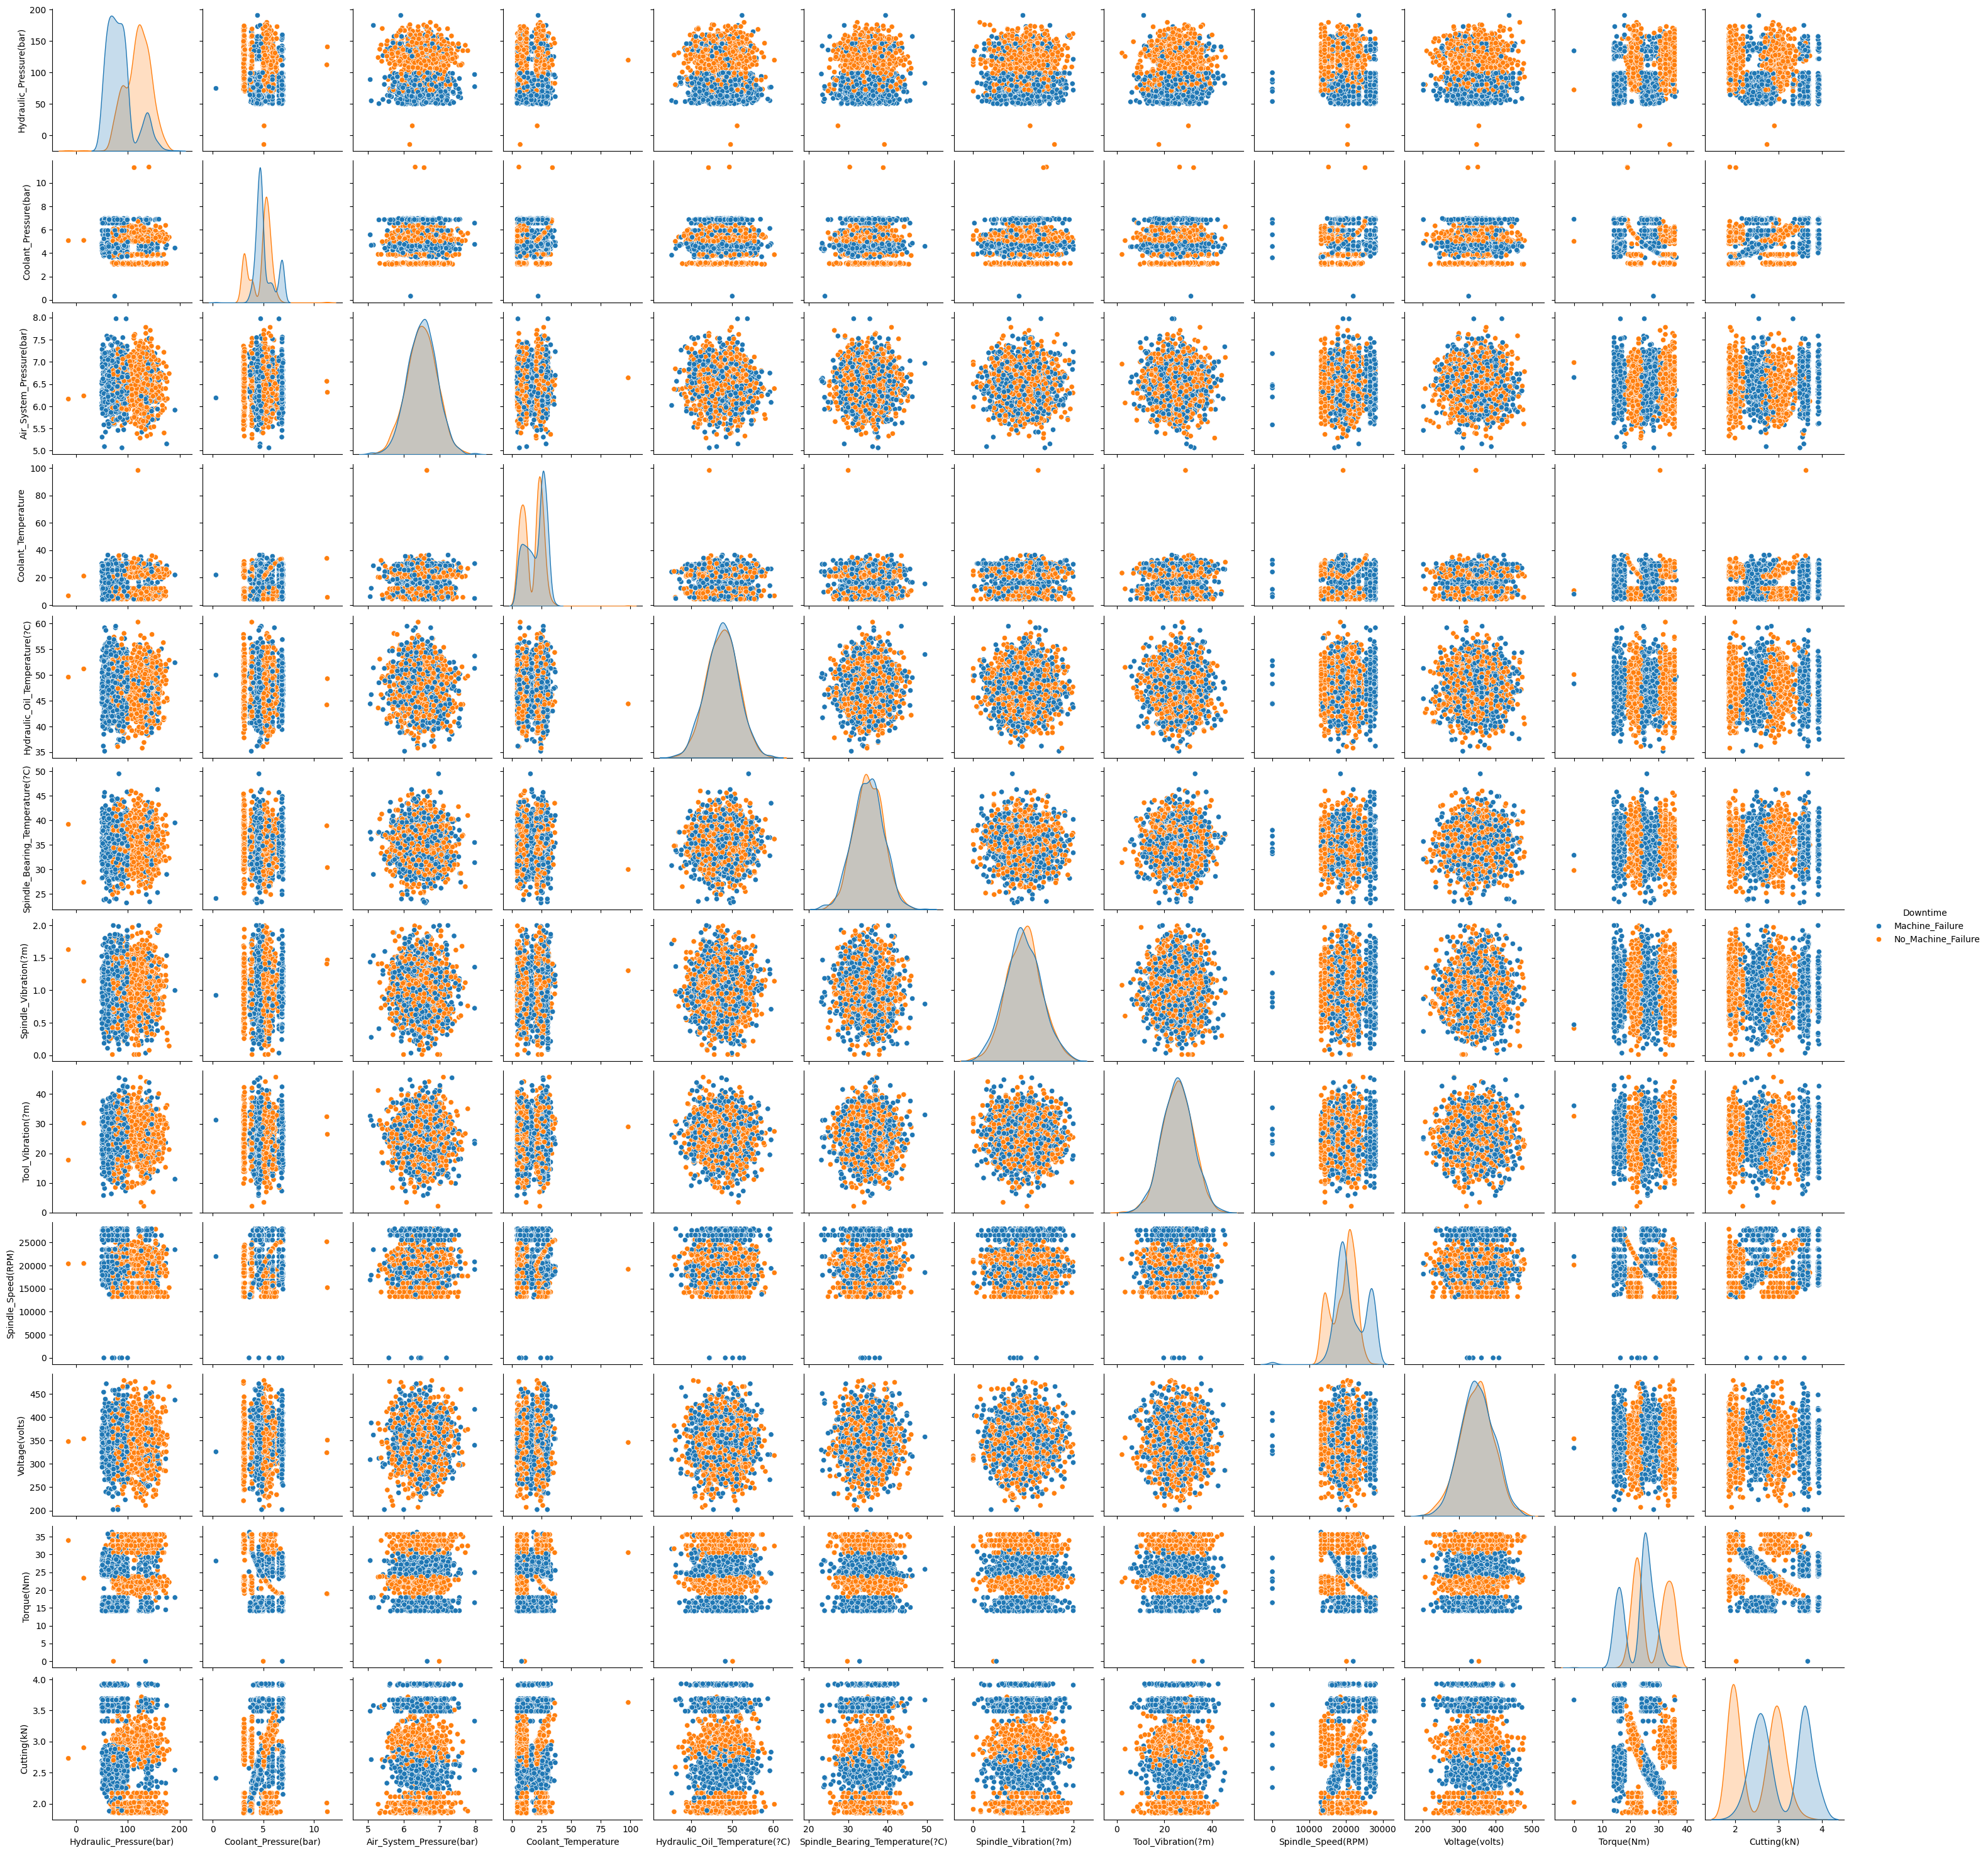

In [27]:
sns.pairplot(
    train_data[['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
                   'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature',
                   'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
                   'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)',
                   'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime']],
    hue='Downtime', diag_kind='kde'
)



biểu đồ ma trận phân tán cho một số cột trong bộ dữ liệu

In [ ]:
target_column = 'Hydraulic_Pressure(bar)'

In [ ]:
if target_column in data.columns:
    numeric_data = data.select_dtypes(include=['float64', 'int32'])
    X = numeric_data.drop(target_column, axis=1)
    y = data[target_column]
else:
    print(f"Cột '{target_column}' không tồn tại trong DataFrame.")
    exit()

Xác định cột mục tiêu là Hydraulic_Pressure(bar), chỉ giữ lại các cột có kiểu số làm đầu vào X, và y là cột mục tiêu.

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

Loại bỏ các giá trị bị thiếu trong y, sau đó đảm bảo X tương ứng với chỉ mục của y.

In [ ]:
y = y.dropna()
X_imputed = X_imputed[y.index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

Chia dữ liệu thành tập huấn luyện và kiểm tra với tỷ lệ 80/20, đảm bảo tính ngẫu nhiên với random_state=42.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Tạo một mô hình hồi quy tuyến tính và huấn luyện nó trên tập dữ liệu huấn luyện.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Dự đoán giá trị áp suất cho tập kiểm tra và tính các chỉ số đánh giá: MSE và R^2 Score.

In [ ]:
print("Đánh giá mô hình:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


print("Hệ số hồi quy:", model.coef_)
print("Intercept:", model.intercept_)

Đánh giá mô hình:
Mean Squared Error: 819.4431925521909
R^2 Score: 0.05785535301481426
Hệ số hồi quy: [-8.01611603e-01 -1.26302572e+00 -3.29632173e-01 -6.22216351e-03
  3.62610346e-02 -2.14477299e+00  1.17505800e-01 -3.68259698e-04
 -1.55365378e-02  5.83408632e-01 -8.71409171e+00]
Intercept: 140.11085480790143


In ra các hệ số hồi quy và hằng số chặn của mô hình để hiểu tầm quan trọng của từng đặc trưng.